# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1OjWCpwRHlCSNYaJoUUd2QGryT9CoQJ5e"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Customers Segmentation
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1Q43AkxxDy4g-zl5lIX4_PBJtTguh4Ise)

![alt text](https://drive.google.com/uc?id=1uS6vsccMt3koetsp3k9cAIfbpJw7Z1J8)

![alt text](https://drive.google.com/uc?id=1r1FjdO8duujUoI904Oy4vbza6KktxSXo)

![alt text](https://drive.google.com/uc?id=1vMr3ouoZ6Pc1mba1mBm2eovlJ3tfE6JA)

![alt text](https://drive.google.com/uc?id=1VvqzWWY8wFGeP4cl-rVtWVOg1P6saHfZ)

![alt text](https://drive.google.com/uc?id=1LpdL0-4E9lbc4s-x6eJ5zkyIVw_OpHuJ)

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# You have to include the full link to the csv file containing your dataset

customers_df = pd.read_csv("/content/drive/MyDrive/Portfolio Data Enthusiast/Udemy DataScienceforBusiness Marketing Dep/Marketing_data.csv")
customers_df.head()

# CUSTID: Identification of Credit Card holder 
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user  
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
customers_df.describe()

# Mean balance is $1564 
# Balance frequency is frequently updated on average ~0.9
# Purchases average is $1000
# one off purchase average is ~$600
# Average purchases frequency is around 0.5
# average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
# Average credit limit ~ 4500
# Percent of full payment is 15%
# Average tenure is 11 years

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
# Let's see who made one off purchase of $40761!
customers_df[customers_df['ONEOFF_PURCHASES'] == 40761.250000]

# edited
# the balance, purchases, and oneoff purchases pretty high
# and frequent
# however, cash advance is relatively small and only occurs once.
# So that for these customers we can target marketing ads 
# in the form of cash advance service ads (just for example)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [7]:
customers_df['CASH_ADVANCE'].max()

47137.211760000006

In [8]:
# challange!
# Let's see who made cash advance of $47137!
# This customer made 123 cash advance transactions!!
# Never paid credit card in full

max_cash_advance = customers_df['CASH_ADVANCE'].max()
customers_df[customers_df['CASH_ADVANCE'] == max_cash_advance]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


# TASK #3: VISUALIZE AND EXPLORE DATASET

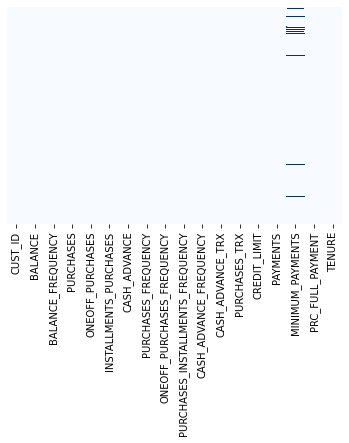

In [9]:
# Let's see if we have any missing data, luckily we don't!
sns.heatmap(customers_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [10]:
customers_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

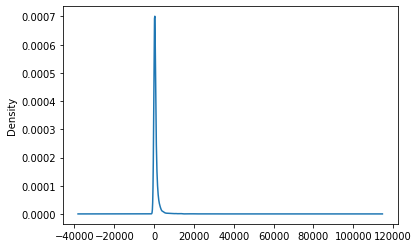

In [11]:
# edited
# Look the distribution of columns that have missing value
customers_df['MINIMUM_PAYMENTS'].plot.kde()

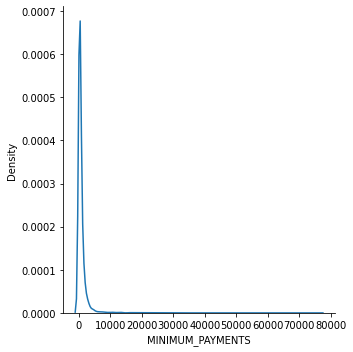

In [13]:
sns.displot(customers_df, x='MINIMUM_PAYMENTS', kind='kde')

In [14]:
print(f"The median of 'MINIMUM_PAYMENTS' feature is {customers_df['MINIMUM_PAYMENTS'].median()}")
print(f"The mean of 'MINIMUM_PAYMENTS' feature is {customers_df['MINIMUM_PAYMENTS'].mean()}")

The median of 'MINIMUM_PAYMENTS' feature is 312.343947
The mean of 'MINIMUM_PAYMENTS' feature is 864.2065423050814


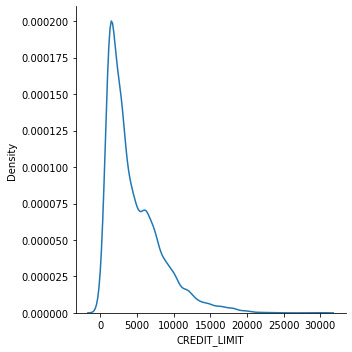

In [15]:
sns.displot(customers_df, x='CREDIT_LIMIT', kind='kde')

In [16]:
print(f"The median of 'CREDIT_LIMIT' feature is {customers_df['CREDIT_LIMIT'].median()}")
print(f"The mean of 'CREDIT_LIMIT' feature is {customers_df['CREDIT_LIMIT'].mean()}")

The median of 'CREDIT_LIMIT' feature is 3000.0
The mean of 'CREDIT_LIMIT' feature is 4494.449450364621


In [17]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT'
# change to fill with median 
customers_df.loc[customers_df['MINIMUM_PAYMENTS'].isnull(), 'MINIMUM_PAYMENTS'] = customers_df['MINIMUM_PAYMENTS'].median() 

In [18]:
customers_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [19]:
# challange!
# Fill up the missing elements with mean of the 'CREDIT_LIMIT' 
customers_df['CREDIT_LIMIT'].fillna(value=customers_df['CREDIT_LIMIT'].mean(), 
                                    inplace=True)

In [20]:
customers_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

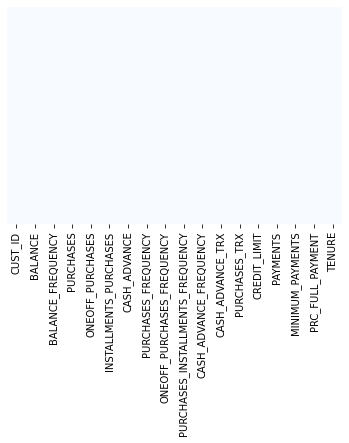

In [21]:
sns.heatmap(customers_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [22]:
# Let's see if we have duplicated entries in the data
customers_df.duplicated().sum()

0

In [23]:
# Let's drop Customer ID since it has no meaning here 
customers_df.drop(columns=['CUST_ID'], inplace=True)
# or
# customers_df.drop('CUST_ID', axis=1, inplace=True)

In [24]:
customers_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [25]:
n = customers_df.shape[1]
n

17

In [26]:
len(customers_df.columns)

17

In [27]:
customers_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

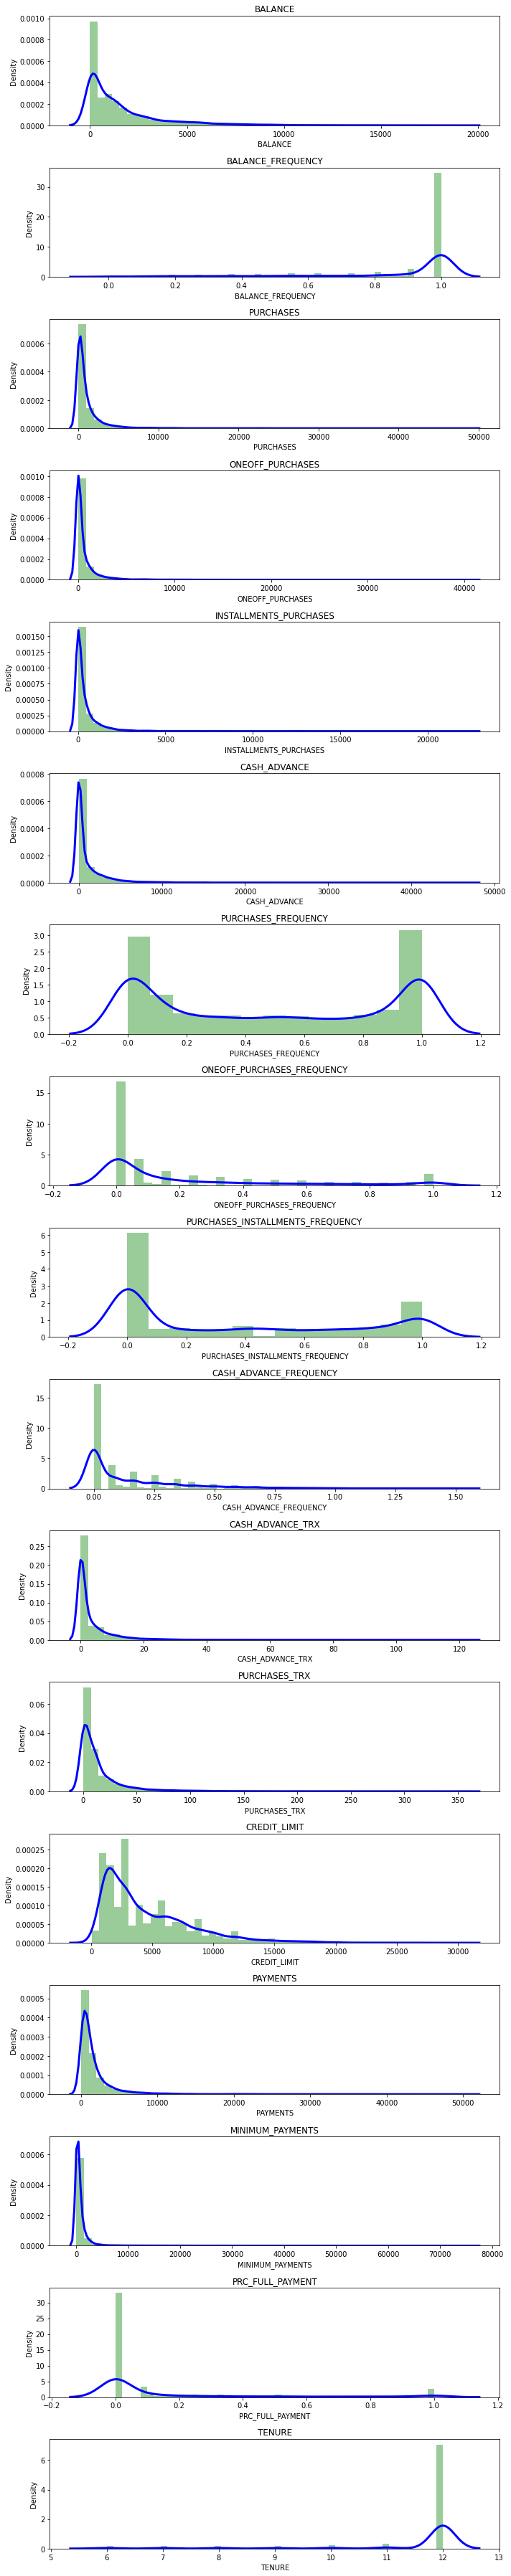

In [28]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure

plt.figure(figsize=(10, 50))
for i in range(n):
  # n is number of columns
  plt.subplot(17, 1, i+1)
  sns.distplot(customers_df[customers_df.columns[i]], 
               kde_kws={'color': 'b', 'lw': 3, 'label': 'KDE'}, 
               hist_kws={'color': 'g'})
  plt.title(customers_df.columns[i])

plt.tight_layout()


Since ```seaborn.distplot()``` is deprecated then I'll try to use ```seaborn.displot()``` instead.

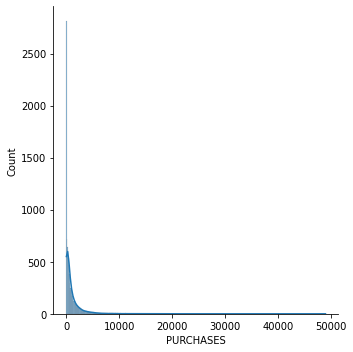

In [29]:
# seaborn.displot()
# plt.figure(figsize=(8, 50))
sns.displot(customers_df, x='PURCHASES', kde=True)
# not solved yet, try use FacetGrid

In [30]:
# sns.pairplot(customers_df)
# Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES 
# Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'
# takes a lot of time, but you can try it

In [31]:
correlations = customers_df.corr()

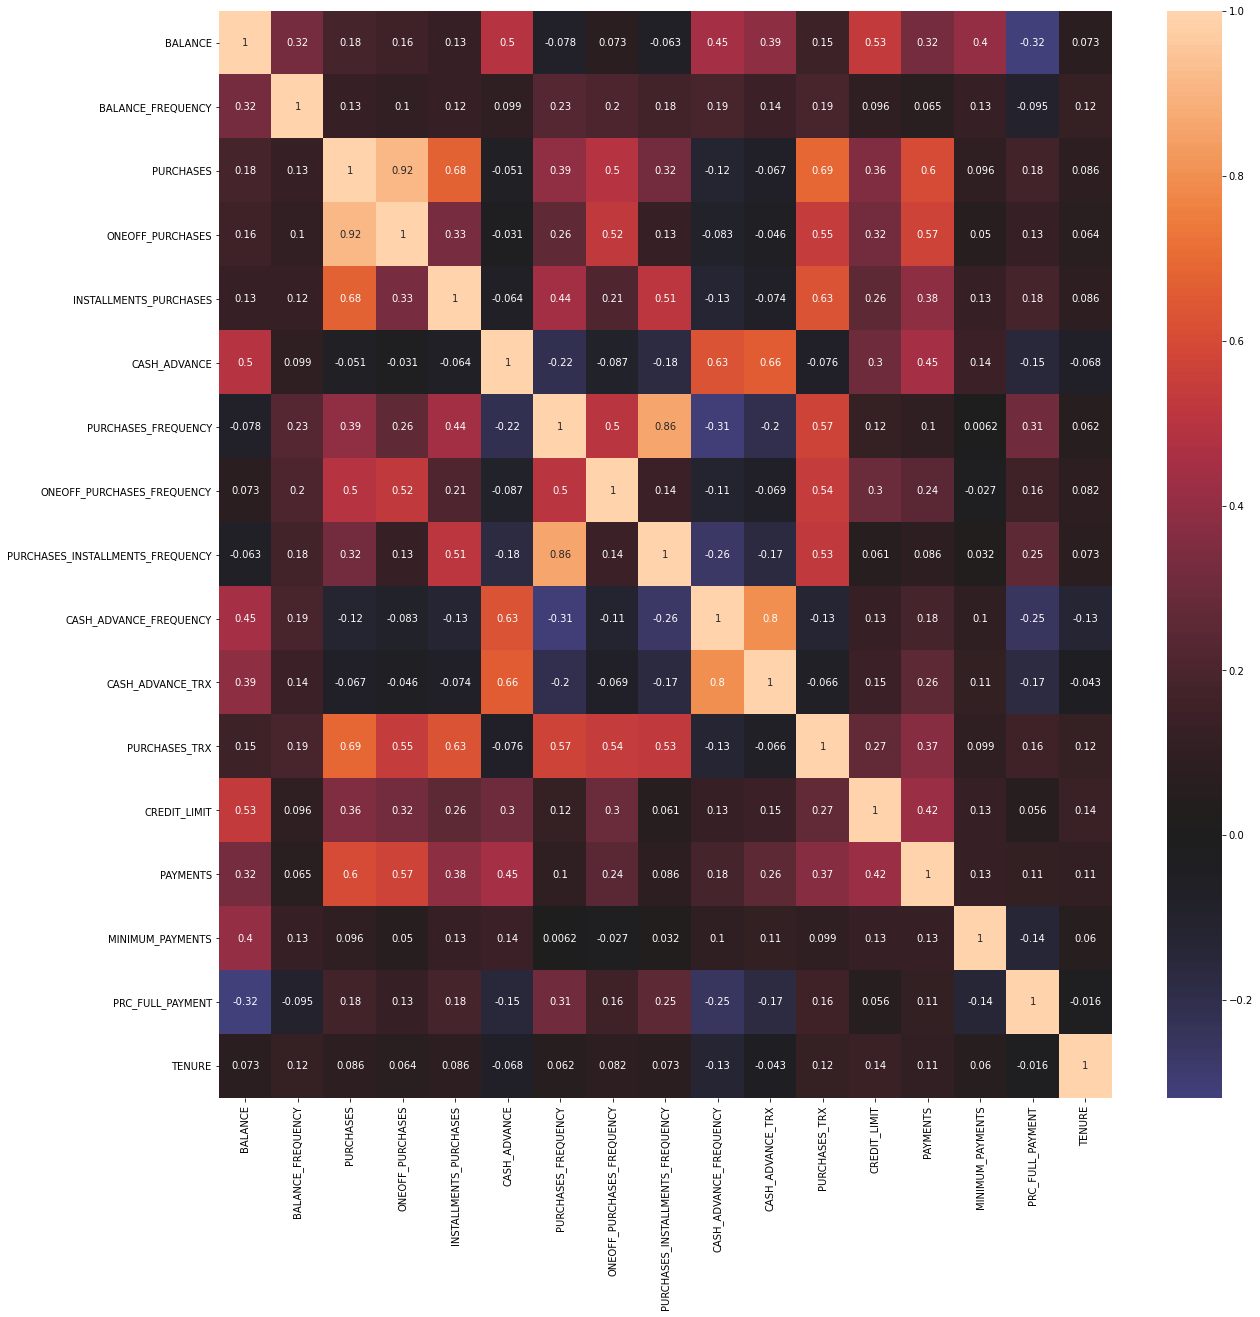

In [32]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlations, annot=True, center=0)
# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'

# TASK #4: UNDERSTAND THE THEORY AND INTUITON BEHIND K-MEANS

![alt text](https://drive.google.com/uc?id=1EBCmP06GuRjVfPgTfH85Yhv9xIAZUj-K)

![alt text](https://drive.google.com/uc?id=1EYWyoec9Be9pYkOaJTjPooTPWgRlJ_Xz)

![alt text](https://drive.google.com/uc?id=1ppL-slQPatrmHbPBEaT3-8xNH01ckoNE)

![alt text](https://drive.google.com/uc?id=1Yfi-dpWW3keU5RLgwAT4YmQ2rfY1GxUh)

![alt text](https://drive.google.com/uc?id=1bLRDIZRda0NSTAdcbugasIjDjvgw4JIU)

![alt text](https://drive.google.com/uc?id=1rBQziDU0pS1Fz0m8VQRjQuBoGFSX1Spb)

![alt text](https://drive.google.com/uc?id=1BOX2q8R_8E4Icb4v1tpn1eymCTJY2b5o)

![alt text](https://drive.google.com/uc?id=1v7hJEPiigSeTTaYo0djbO-L4uEnTpcAU)

# TASK #5: FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

In [33]:
# Let's scale the data first
# edited
# this time I use PowerTransform
from sklearn.preprocessing import PowerTransformer

In [34]:
pt = PowerTransformer()

In [35]:
customers_df_scaled = pt.fit_transform(customers_df)

In [36]:
customers_df_scaled.shape

(8950, 17)

In [37]:
customers_df_scaled

array([[-1.23810255, -1.07934822, -0.3680498 , ..., -0.8243882 ,
        -0.67788891,  0.4222524 ],
       [ 1.05196103, -0.42493868, -1.5051492 , ...,  0.91739265,
         1.23502135,  0.4222524 ],
       [ 0.86061607,  0.62861188,  0.52165703, ...,  0.47590556,
        -0.67788891,  0.4222524 ],
       ...,
       [-1.40934942, -0.99132356, -0.21630032, ..., -1.30074812,
         1.32845486, -2.52661164],
       [-1.55853737, -0.99132356, -1.5051492 , ..., -1.66076587,
         1.32845486, -2.52661164],
       [-0.32431033, -1.6463113 ,  0.70202621, ..., -1.23789801,
        -0.67788891, -2.52661164]])

In [38]:
wcss = []
K = range(1, 10)

for k in K:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(customers_df_scaled)
  wcss.append(kmeans.inertia_)


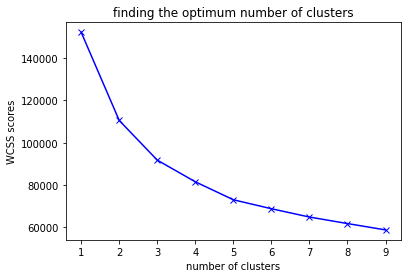

In [39]:
plt.plot(K, wcss, 'bx-')
plt.title("finding the optimum number of clusters")
plt.xlabel("number of clusters")
plt.ylabel("WCSS scores")
plt.show()

# From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
# However, the values does not reduce linearly until 8th cluster. 
# Let's choose the number of clusters to be 7.
# edited
# choose number of cluster to be 5

# TASK #6: APPLY K-MEANS METHOD

In [40]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(customers_df_scaled)
labels = kmeans.labels_

In [41]:
kmeans.cluster_centers_.shape

(5, 17)

In [42]:
# create cluster centers dataframe
cluster_centers_df = pd.DataFrame(data=kmeans.cluster_centers_, columns=[customers_df.columns])
cluster_centers_df 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.128931,0.430308,1.110327,1.085540,0.914678,-0.873506,0.985281,1.177661,0.824864,-0.835066,-0.853060,1.143213,0.573655,0.634036,0.009367,0.389239,0.294231
1,0.439775,0.054991,-1.291139,-0.779904,-1.032665,1.007116,-1.205280,-0.761579,-0.976476,0.946125,0.962372,-1.257105,-0.129999,-0.063489,0.264939,-0.384917,-0.173934
2,-0.505799,-0.518424,0.164903,0.764014,-0.808225,-0.779331,-0.401321,0.580391,-0.864908,-0.760709,-0.773222,-0.207172,-0.144495,-0.437164,-0.450615,-0.207116,-0.018717
3,-0.941082,-0.384643,0.156254,-0.843493,0.781468,-0.889958,0.597488,-0.799936,0.860193,-0.841428,-0.861967,0.328641,-0.446315,-0.523308,-0.601711,0.603841,-0.009382
4,0.815183,0.435691,0.629199,0.577133,0.472141,1.074279,0.553800,0.563516,0.420597,1.055747,1.084789,0.651657,0.338179,0.529176,0.732591,-0.354481,0.016468


In [43]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = pt.inverse_transform(cluster_centers_df)
cluster_centers_df = pd.DataFrame(data=cluster_centers, columns=[customers_df.columns])
cluster_centers_df

# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 
# the above statement from the lecturer needs to be revisited 
# as there are workflow differences and my lack in this business cases.

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,841.168505,0.985803,2238.237931,837.504211,480.925379,0.208104,0.885197,0.378358,0.596372,0.003072,0.027123,31.096891,5303.962201,2048.144737,361.289184,0.082281,11.970917
1,1374.125965,0.955777,2.223914,0.816608,0.181876,870.848582,0.022850,0.012212,0.005375,0.205982,3.445119,0.191376,2999.383788,857.831631,487.886859,0.018007,11.852675
2,258.221812,0.898509,364.653989,244.066362,1.399860,0.559644,0.296996,0.193780,0.027499,0.007944,0.070598,3.945363,2963.805559,501.116573,212.636383,0.030282,11.894178
3,94.095970,0.913477,357.624002,0.526062,321.491615,0.156034,0.704965,0.008829,0.616586,0.002662,0.022456,9.330695,2307.674193,438.862727,179.156059,0.107111,11.896595
4,2347.228317,0.986202,952.864593,123.696434,125.222210,1198.317434,0.685453,0.190196,0.400550,0.231784,4.318133,15.161971,4391.453789,1813.810284,855.272265,0.020029,11.903246


In [44]:
labels.shape

(8950,)

In [45]:
labels.max()

4

In [46]:
labels.min()

0

In [47]:
labels

array([3, 1, 2, ..., 3, 1, 2], dtype=int32)

In [49]:
# concatenate the clusters labels to our original dataframe
customers_clusters_df = pd.concat([customers_df, pd.DataFrame({'cluster': labels})], axis=1)
customers_clusters_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


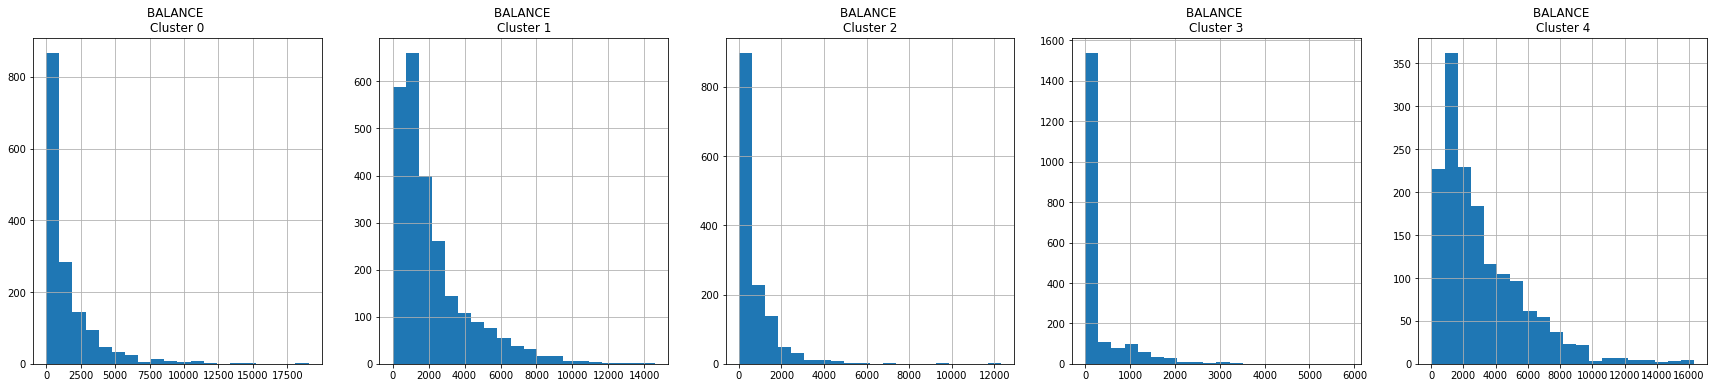

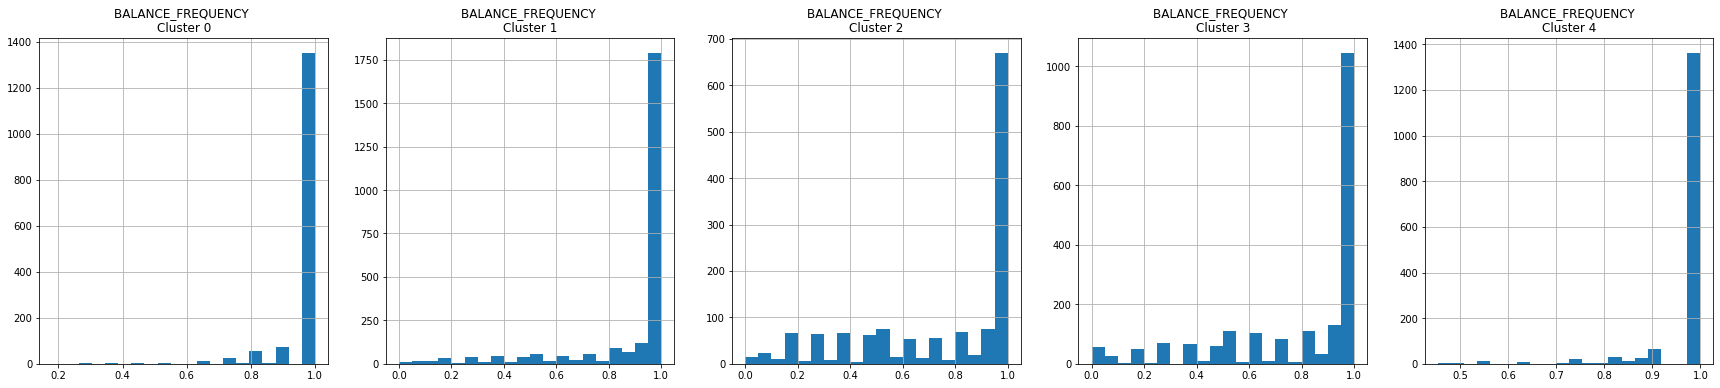

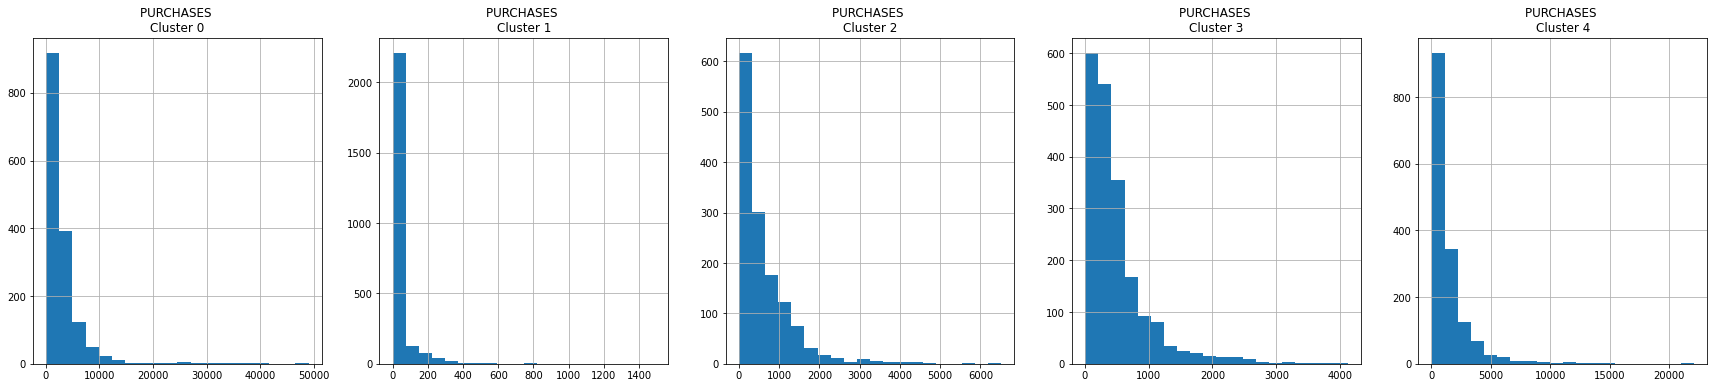

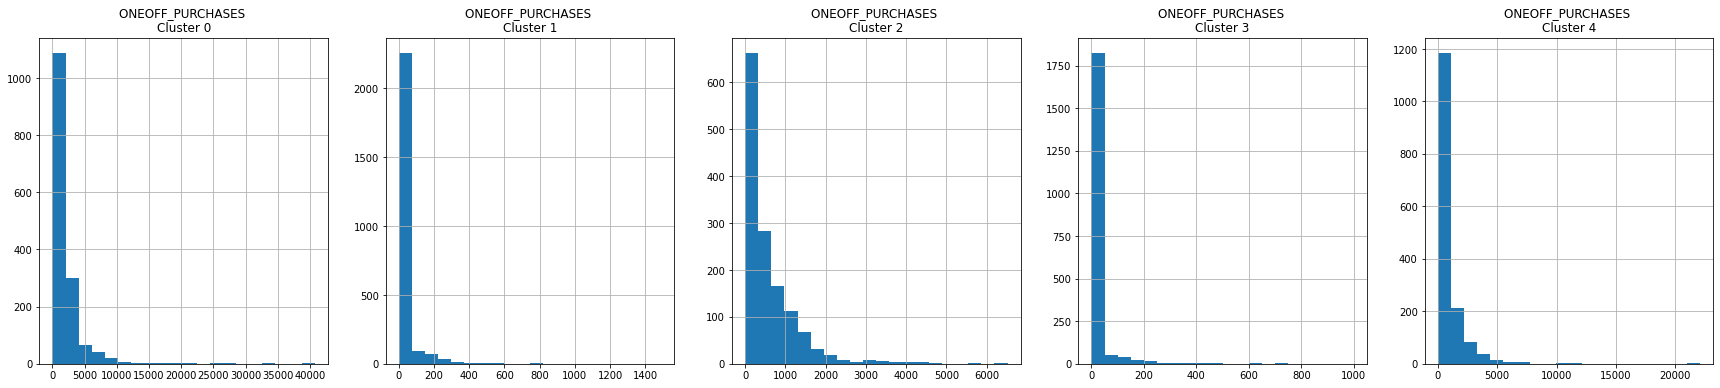

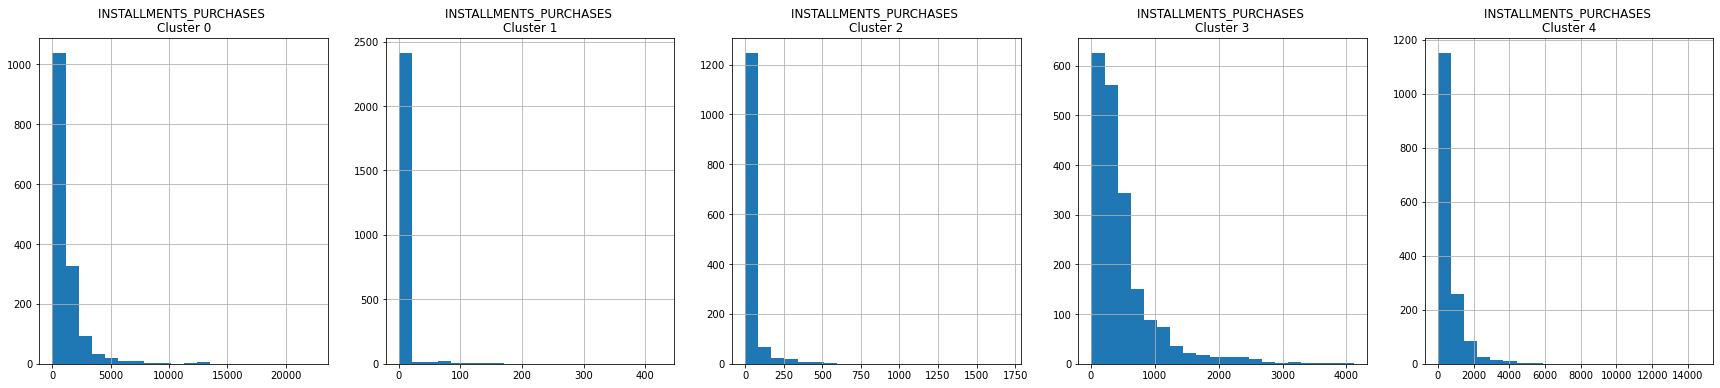

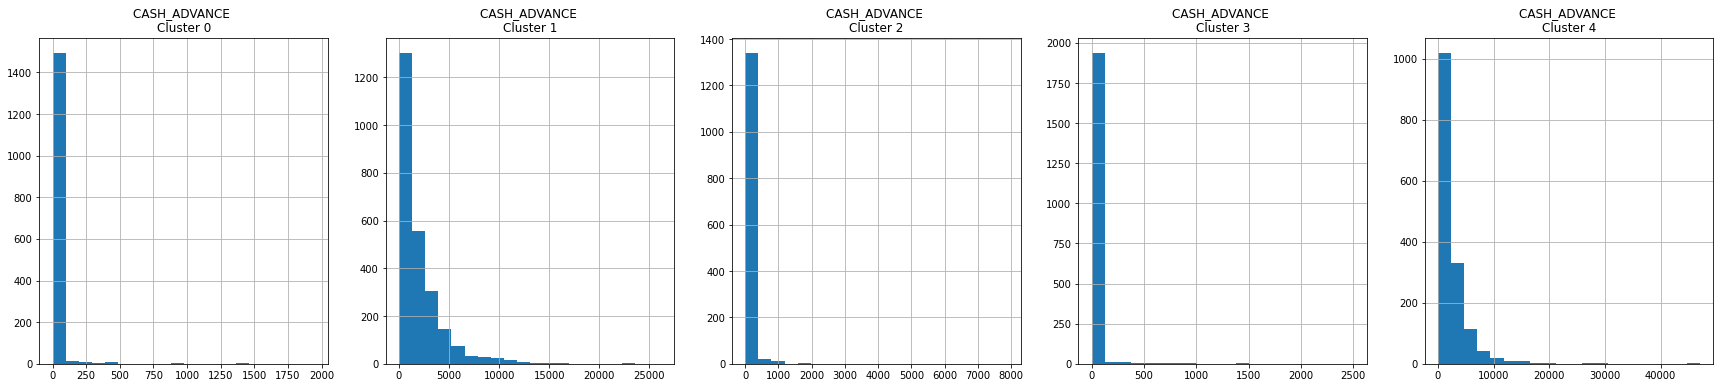

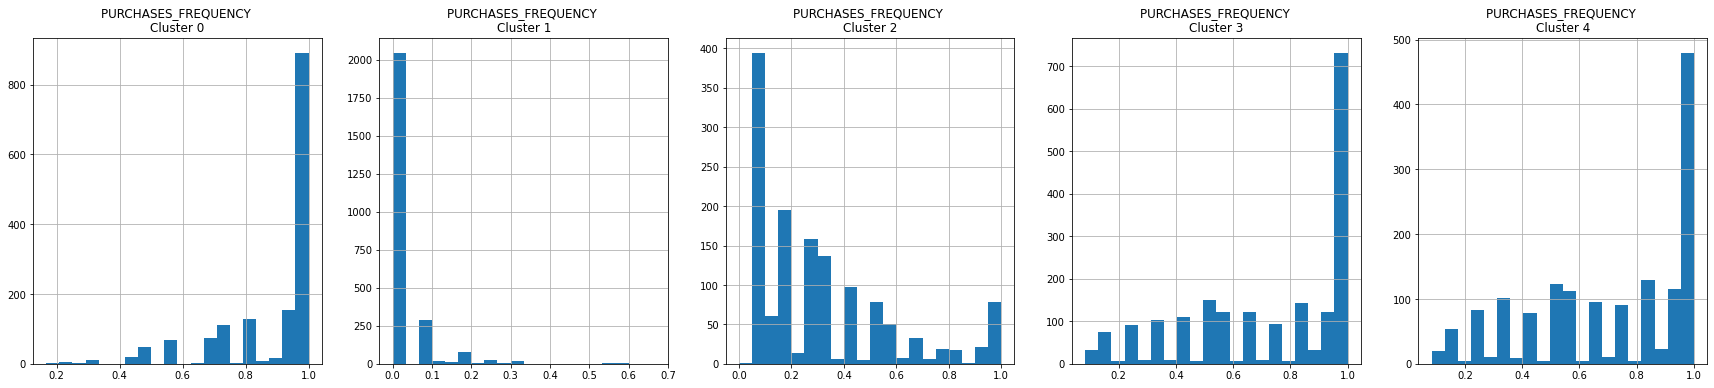

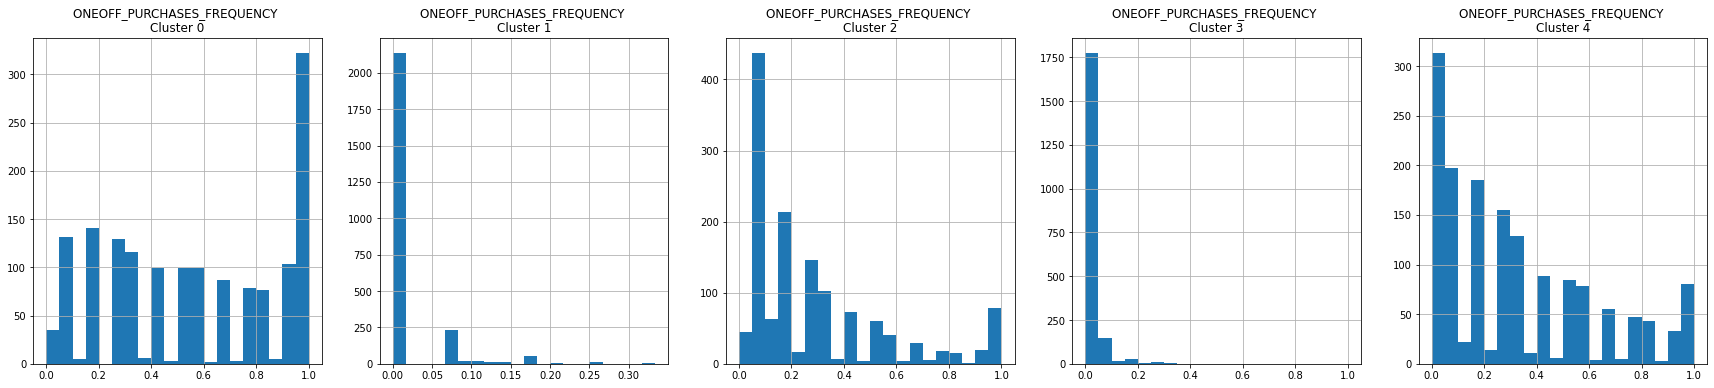

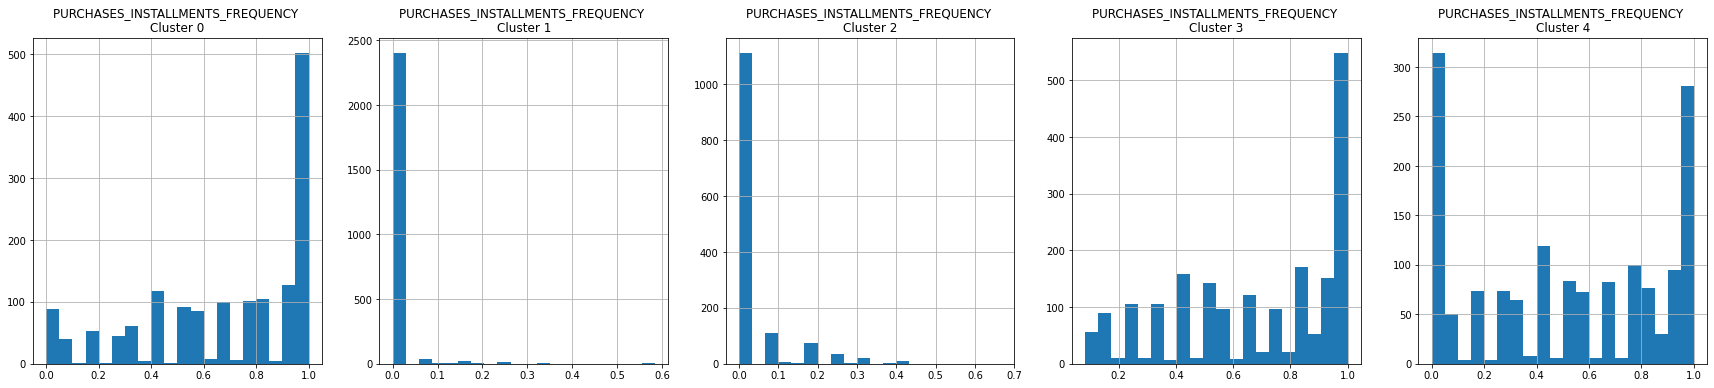

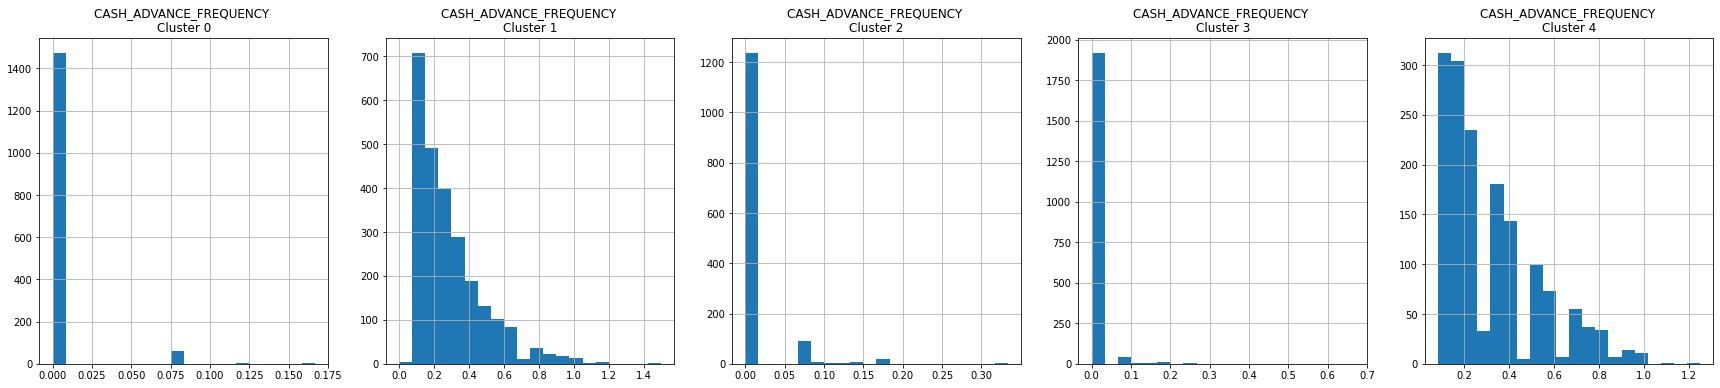

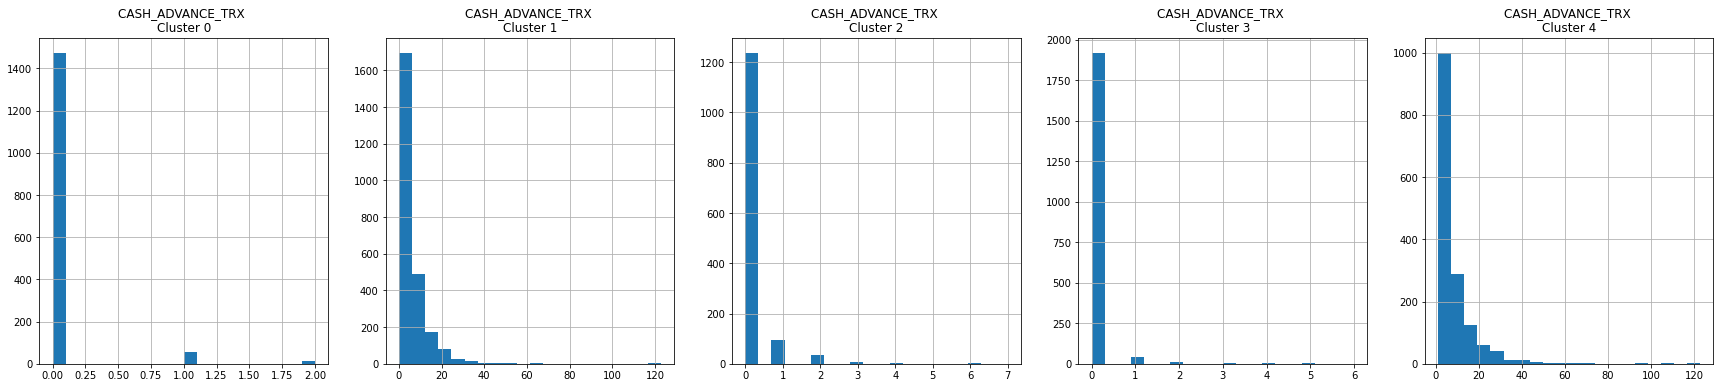

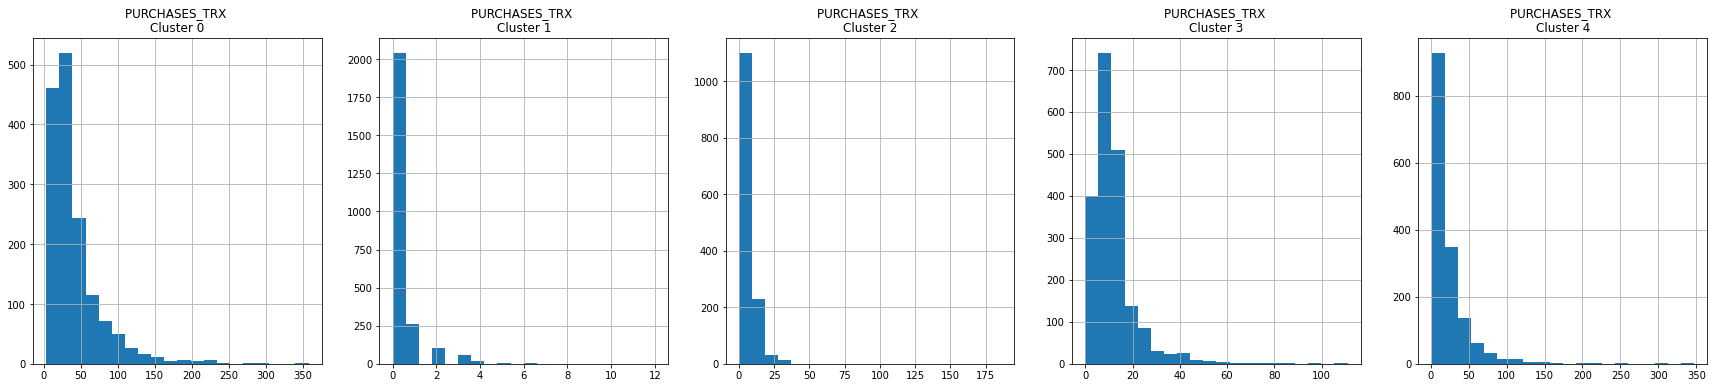

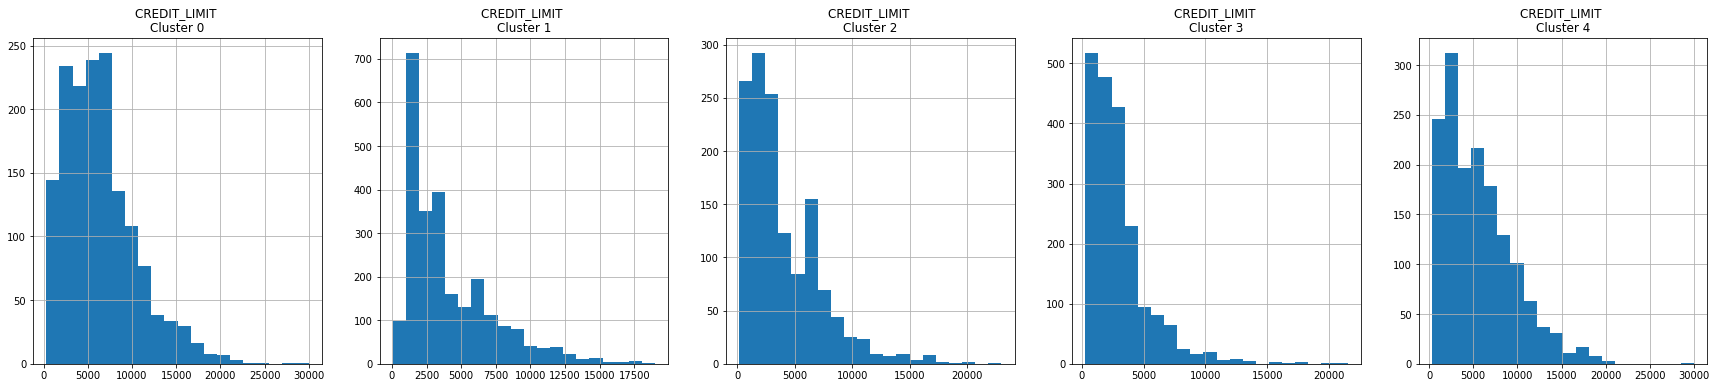

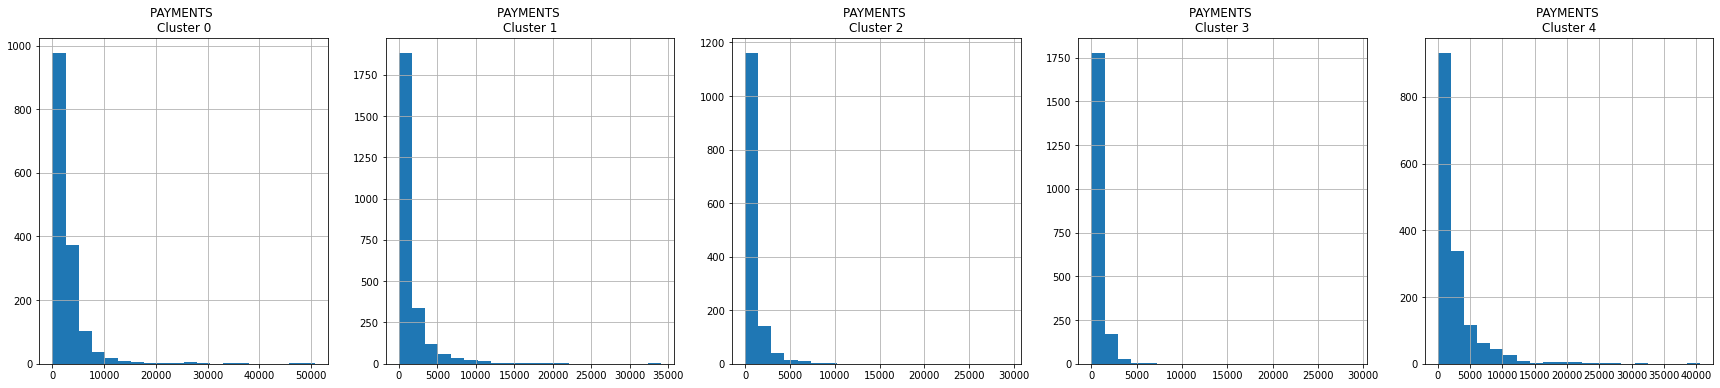

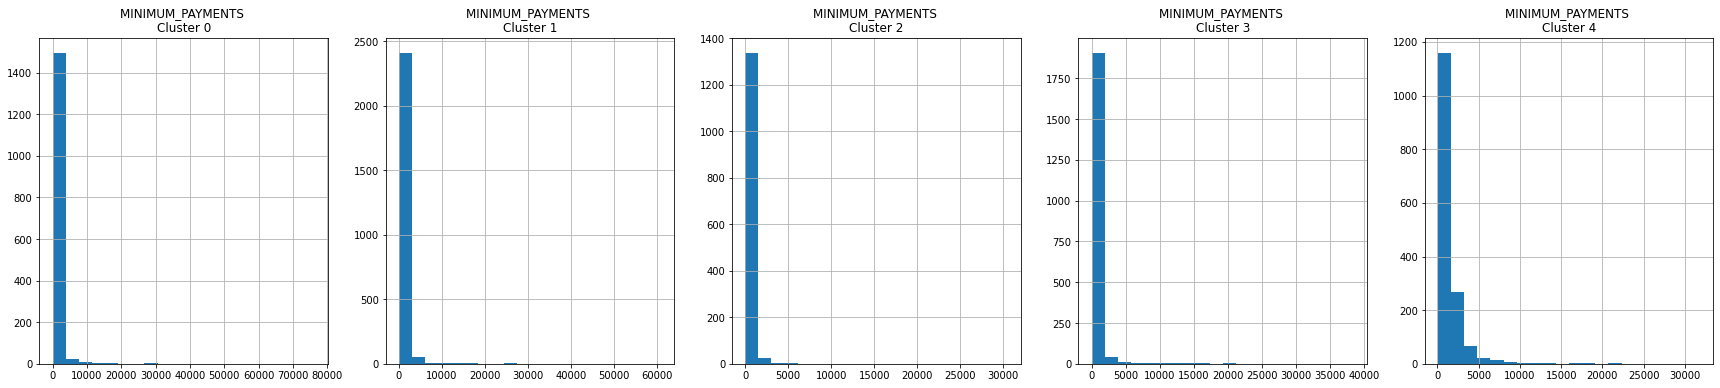

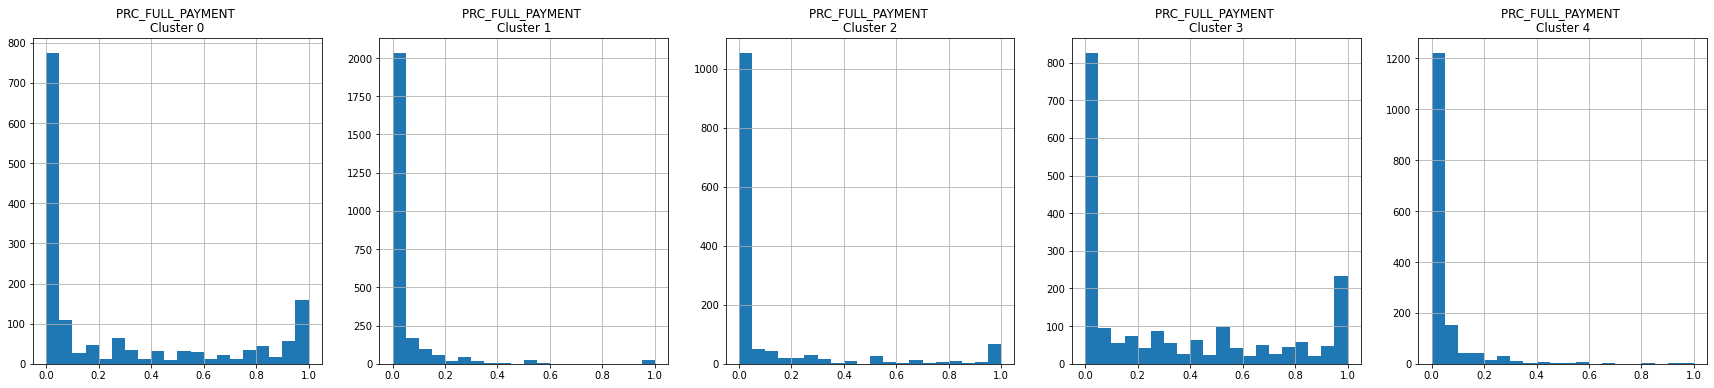

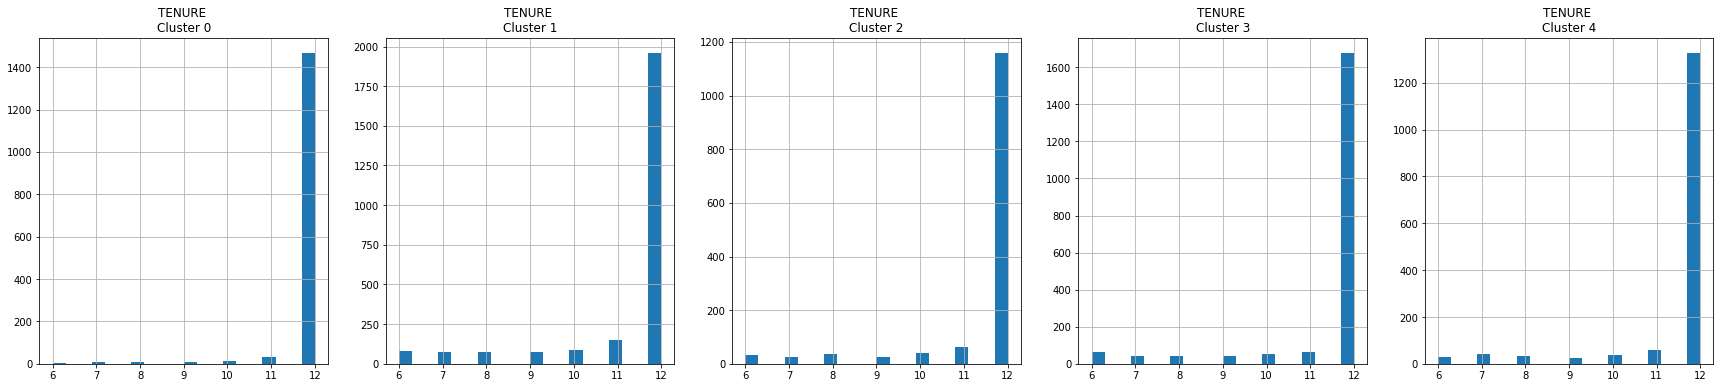

In [51]:
# Plot the histogram of various clusters
# using built-in pandas plot

for col in customers_df.columns:
  plt.figure(figsize=(30, 6))
  for i in range(5): # number of clusters
    plt.subplot(1, 5, i+1)
    cluster = customers_clusters_df[customers_clusters_df['cluster'] == i]
    cluster[col].hist(bins=20)
    plt.title(f"{col} \nCluster {i}")

plt.show()

# TASK 7: APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

![alt text](https://drive.google.com/uc?id=1xDuvEnbuNqIjX5Zng39TCfGCf-BBDGf0)

In [52]:
# Obtain the principal components 
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(customers_df_scaled)
principal_comp

array([[-0.25748539, -3.11601011],
       [-3.47915746,  0.87780841],
       [ 1.33812871,  1.18742573],
       ...,
       [ 1.28054232, -3.65782606],
       [-2.81194172, -3.91455205],
       [-0.3480839 , -0.56258695]])

In [53]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data=principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-0.257485,-3.116010
1,-3.479157,0.877808
2,1.338129,1.187426
3,-1.374114,-0.532220
4,-1.009675,-1.404851


In [55]:
# Concatenate the clusters labels to the dataframe
pca_cluster_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis=1)
pca_cluster_df.head()

,pca1,pca2,cluster
0,-0.257485,-3.116010,3
1,-3.479157,0.877808,1
2,1.338129,1.187426,2
3,-1.374114,-0.532220,2
4,-1.009675,-1.404851,2


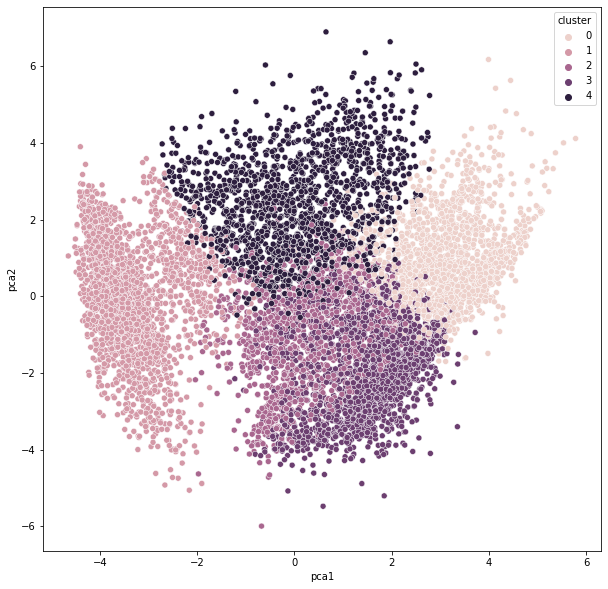

In [56]:
plt.figure(figsize=(10, 10))
ax = sns.scatterplot(data=pca_cluster_df, x='pca1', y='pca2', hue='cluster')

# TASK #8: UNDERSTAND THE THEORY AND INTUITION BEHIND AUTOENCODERS

![alt text](https://drive.google.com/uc?id=1g0tWKogvKaCrtsfzjApi6m8yGD3boy4x)

![alt text](https://drive.google.com/uc?id=1AcyUL_F9zAD2--Hmyq9yTkcA9mC6-bwg)

![alt text](https://drive.google.com/uc?id=1xk1D5uldId0DWywRJ3-OAVBcIr5NGCq_)

# TASK #9: APPLY AUTOENCODERS (PERFORM DIMENSIONALITY REDUCTION USING AUTOENCODERS)

In [57]:
# import libraries
from tensorflow.keras.layers import Input, Add, Dense, Activation, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import SGD

In [61]:
# build the network
input_df = Input(shape=(17,))

encoded = Dense(7, activation='relu')(input_df)
encoded = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(encoded)
encoded = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(encoded)
encoded = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(encoded)
encoded = Dense(10, activation='relu', kernel_initializer='glorot_uniform')(encoded) # the bottleneck

decoded = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(encoded)
decoded = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(decoded)
# decoded = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(decoded)
decoded = Dense(17, kernel_initializer='glorot_uniform')(decoded)

# autoencoder
autoencoder = Model(input_df, decoded)

# encoder
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [59]:
customers_df_scaled.shape

(8950, 17)

In [62]:
autoencoder.fit(customers_df_scaled, customers_df_scaled, batch_size=128, epochs=25, verbose=1)

Epoch 1/25
70/70 [==============================] - 5s 58ms/step - loss: 0.6585
Epoch 2/25
70/70 [==============================] - 4s 56ms/step - loss: 0.2631
Epoch 3/25
70/70 [==============================] - 4s 58ms/step - loss: 0.2103
Epoch 4/25
70/70 [==============================] - 4s 56ms/step - loss: 0.1810
Epoch 5/25
70/70 [==============================] - 4s 57ms/step - loss: 0.1653
Epoch 6/25
70/70 [==============================] - 4s 56ms/step - loss: 0.1521
Epoch 7/25
70/70 [==============================] - 4s 57ms/step - loss: 0.1393
Epoch 8/25
70/70 [==============================] - 4s 57ms/step - loss: 0.1253
Epoch 9/25
70/70 [==============================] - 4s 57ms/step - loss: 0.1190
Epoch 10/25
70/70 [==============================] - 4s 59ms/step - loss: 0.1110
Epoch 11/25
70/70 [==============================] - 4s 59ms/step - loss: 0.1047
Epoch 12/25
70/70 [==============================] - 4s 58ms/step - loss: 0.1014
Epoch 13/25
70/70 [==================

In [63]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense_9 (Dense)              (None, 7)                 126       
_________________________________________________________________
dense_10 (Dense)             (None, 500)               4000      
_________________________________________________________________
dense_11 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_12 (Dense)             (None, 2000)              1002000   
_________________________________________________________________
dense_13 (Dense)             (None, 10)                20010     
_________________________________________________________________
dense_14 (Dense)             (None, 2000)              2200

In [67]:
customers_df_encode = encoder.predict(customers_df_scaled)

In [70]:
customers_df_encode.shape

(8950, 10)

In [71]:
customers_df_encode

array([[0.        , 0.        , 1.7052473 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        2.5837336 ],
       [0.        , 0.        , 3.7269666 , ..., 0.        , 0.        ,
        2.7569687 ],
       ...,
       [0.        , 0.        , 2.8651671 , ..., 0.        , 0.        ,
        0.07228787],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.83310527],
       [0.        , 0.        , 1.2804788 , ..., 0.        , 0.        ,
        3.12288   ]], dtype=float32)

In [72]:
wcss = []
K = range(1, 11)

for k in K:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(customers_df_encode)
  wcss.append(kmeans.inertia_)

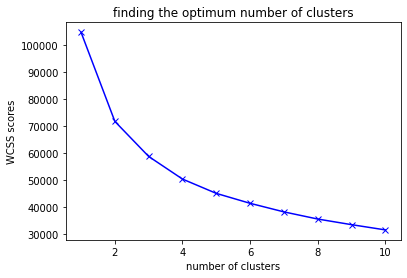

In [73]:
plt.plot(K, wcss, 'bx-')
plt.title("finding the optimum number of clusters")
plt.xlabel("number of clusters")
plt.ylabel("WCSS scores")
plt.show()

In [74]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(customers_df_encode)
labels = kmeans.labels_

In [75]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(customers_df_encode)
principal_comp

array([[-1.4490305 , -1.4782888 ],
       [-2.3736966 ,  1.1070536 ],
       [ 0.940989  ,  0.5009269 ],
       ...,
       [ 0.4066205 , -3.7319818 ],
       [-2.9238532 , -1.0529788 ],
       [-2.3508525 , -0.02228273]], dtype=float32)

In [76]:
pca_df = pd.DataFrame(data=principal_comp, columns=['pca1', 'pca2'])
pca_cluster_df =pd.concat([pca_df, pd.DataFrame({'clusters': labels})], axis=1)

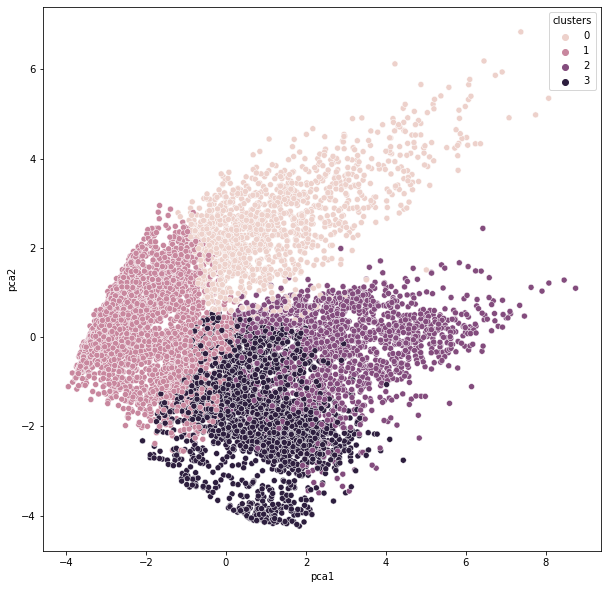

In [78]:
plt.figure(figsize=(10, 10))

ax = sns.scatterplot(data=pca_cluster_df, x='pca1', y='pca2', hue='clusters')

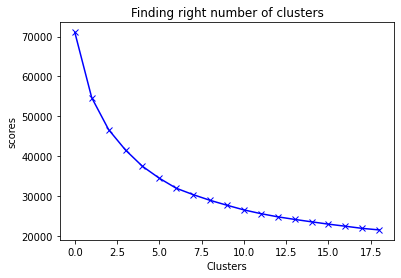

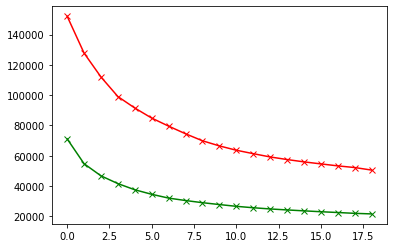

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


,pca1,pca2
0,-1.682221,-1.076451
1,-1.138299,2.506482
2,0.969680,-0.383501
3,-0.873630,0.043168
4,-1.599433,-0.688583


,pca1,pca2,cluster
0,-1.682221,-1.076451,3
1,-1.138299,2.506482,3
2,0.969680,-0.383501,3
3,-0.873630,0.043168,2
4,-1.599433,-0.688583,3


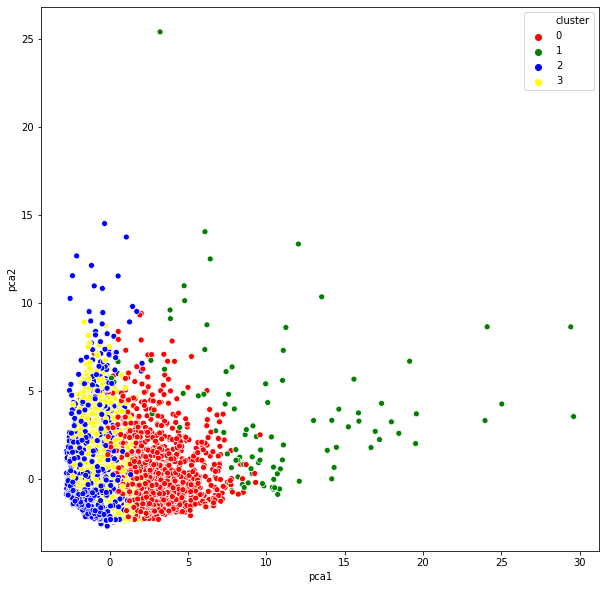

# EXCELLENT JOB! YOU SHOULD BE PROUD OF YOUR NEWLY ACQUIRED SKILLS